# Problem 1: Tensorflow Random Walks

https://www.tensorflow.org/guide/random_numbers?hl=hr#setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dims = 3
n_walkers = 1000
n_steps = 5000
t = np.arange(n_steps)
# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]
# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers,n_steps,dims)
# These are the steps at each stage
steps = np.random.choice(a=step_set, size=step_shape)
# Now we add up the steps for each walker to get the x positions
x = steps.cumsum(axis=1)

Text(0, 0.5, 'x position')

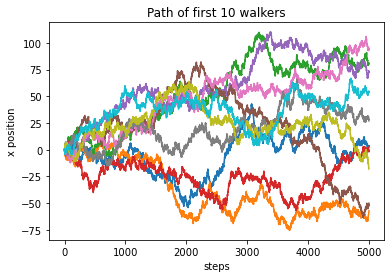

In [3]:
for i in range( min(10,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 10 walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### Accumulate statistics

Here, we now want to determine the relationship between diffusion and walks. 

We know from lecture that after the $n$th step, each walker will have position

$$
x_n = \sum_{i=1}^n s_i
$$

where $s_i$ is each walkers' step from the `steps` construct above. The average of $s_i$ is zero because they are uniformly chosen from $(-1,0,1)$. However, the standard deviation for each walker is

$$
\left< x_n^2 \right> = \left< \sum_{i=1}^{n} \sum_{j=1}^{n} s_i s_j \right>
$$

$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

If there are $m$ walkers each walking $n$ steps, and the index $k$ iterates over the walkers, then at each step $n$ we have ensemble averages (in 1 dimension):

$$
\left< x_n^4 \right> = \sum_{k=1}^m \frac{x_{k,n}^4}{m}
$$

$$
\left< x_n^2 \right> = \sum_{k=1}^m \frac{x_{k,n}^2}{m}
$$

The overall diffusion width at the $n$th step, taking these ensemble averages, is therefore

$$
\sigma^2_n = \sqrt{  \left< x_n^4 \right> - \left< x_n^2\right>^2 }
$$

In [4]:
# Now get the averages over the walkers
x2 = np.average( x**2, axis=0 )
x4 = np.average( x**4, axis=0 )
sigma2_nd = np.sqrt( x4 - x2**2 )
sigma2 = np.sum( sigma2_nd, axis=1 )

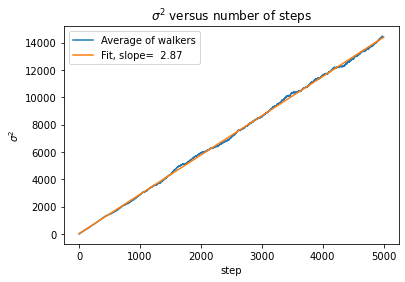

In [5]:
plt.plot( sigma2,  label='Average of walkers' )
res = np.polyfit(t, sigma2,1 )
plt.plot( t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0] )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()